In [13]:
# Importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.ensemble import GradientBoostingRegressor



In [14]:
#Importing Data and visualising the first few records

dtype={'Date':'str','Time':'str','Global_active_power':'str','Global_reactive_power':'str','Voltage':'str','Global_intensity':'str','Sub_metering_1':'str','Sub_metering_2':'str','Sub_metering_3':'float'}
df=pd.read_csv("C:/Users/SESA742087/Downloads/individual+household+electric+power+consumption/household_power_consumption.txt",delimiter=";",dtype=dtype,low_memory=False)
df.head()



,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [15]:
# Correcting the data types

df['Global_active_power']=pd.to_numeric(df['Global_active_power'],errors='coerce')
df['Global_reactive_power']=pd.to_numeric(df['Global_reactive_power'],errors='coerce')
df['Voltage']=pd.to_numeric(df['Voltage'],errors='coerce')
df['Global_intensity']=pd.to_numeric(df['Global_intensity'],errors='coerce')
df['Sub_metering_1']=pd.to_numeric(df['Sub_metering_1'],errors='coerce')
df['Sub_metering_2']=pd.to_numeric(df['Sub_metering_2'],errors='coerce')


In [16]:
# dropping null values

df.dropna(inplace=True)


In [17]:
#checking for duplicates

df.duplicated().sum()

np.int64(0)

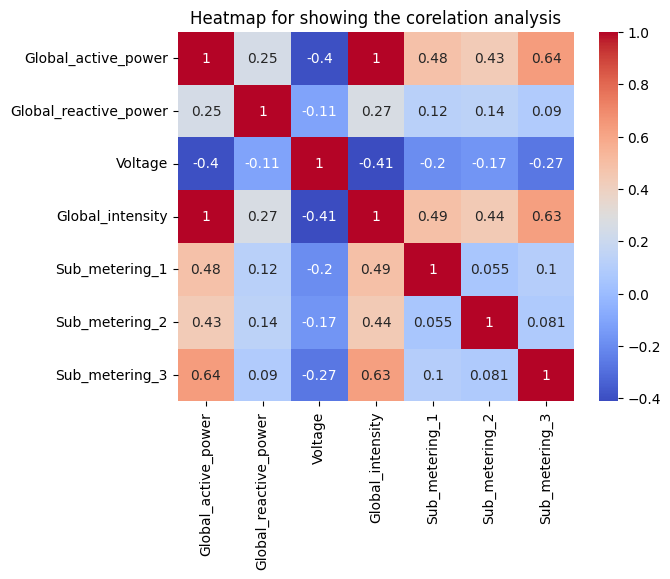

In [18]:
# Corelation Analysis for understanding the relationship between parameters in the given dataset

data=df.drop(columns=['Date','Time'])
corelation_matrix=data.corr()
sns.heatmap(corelation_matrix,annot=True,cmap='coolwarm')
plt.title("Heatmap for showing the corelation analysis")
plt.show()


In [19]:
# Adding Column for Daily Average

df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')
df['Date'] = df['DateTime'].dt.date
daily_average_global_active_power = df.groupby('Date')['Global_active_power'].mean()
df = df.merge(daily_average_global_active_power.rename('DailyAverage'), on='Date')




In [20]:
# Adding Column for IsPeakHour

df.set_index('DateTime',inplace=True)
df_numeric=df.drop(columns=['Date','Time'])
hourly_usage=df_numeric.resample('H').sum()
peak_hours=hourly_usage.nlargest(10,'Global_active_power').index
df['IsPeakHour']=df.index.floor('h').isin(peak_hours)
df.head()



C:\Users\SESA742087\AppData\Local\Temp\ipykernel_10216\793686036.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_usage=df_numeric.resample('H').sum()


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DailyAverage,IsPeakHour
DateTime,,,,,,,,,,,
2006-12-16 17:24:00,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,3.053475,False
2006-12-16 17:25:00,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,3.053475,False
2006-12-16 17:26:00,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,3.053475,False
2006-12-16 17:27:00,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,3.053475,False
2006-12-16 17:28:00,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,3.053475,False


In [21]:
# Checking for Null Values
df.isnull().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
DailyAverage             0
IsPeakHour               0
dtype: int64

In [22]:
# Adding Column for Season
def get_season(month):
    if month in [4,5,6]:
        return 'Summer'
    elif month in [1,2,3]:
        return 'Spring'
    elif month in [9,10,11,12]:
        return 'Winter'
    else:
        return 'Autmn'
df['Season']=df.index.month.map(get_season)
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DailyAverage,IsPeakHour,Season
DateTime,,,,,,,,,,,,
2006-12-16 17:24:00,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,3.053475,False,Winter
2006-12-16 17:25:00,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,3.053475,False,Winter
2006-12-16 17:26:00,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,3.053475,False,Winter
2006-12-16 17:27:00,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,3.053475,False,Winter
2006-12-16 17:28:00,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,3.053475,False,Winter


In [23]:
# Adding lagged values
df['Lag_1'] = df['Global_active_power'].shift(1)
df['Lag_2'] = df['Global_active_power'].shift(2)
df['Lag_3'] = df['Global_active_power'].shift(3)

# Adding rolling averages
df['Rolling_3'] = df['Global_active_power'].rolling(window=3).mean()
df['Rolling_7'] = df['Global_active_power'].rolling(window=7).mean()

# Handling missing values
df.dropna(inplace=True)

Mean Squared Error on training data =  2.852824091177358e-27
Root Mean Squared Error on training data = 5.341183474827801e-14
R2Score on training data= 1.0
Mean Absolute Error on training data = 4.60038048267772e-14
Mean Squared Error =  2.8491306931801973e-27
Root Mean Squared Error = 5.3377248834875306e-14
R2Score= 1.0
Mean Absolute Error = 4.59735160658306e-14


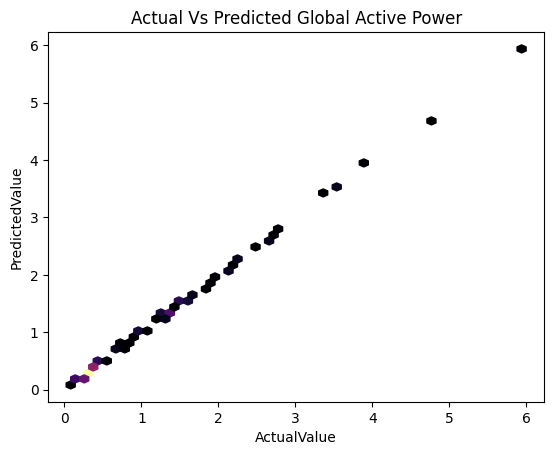

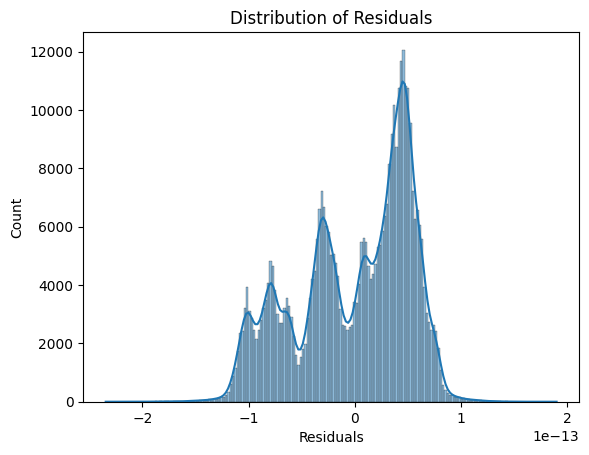

In [ ]:
# Defining the input & output variable

x=df[['Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'Season', 'IsPeakHour','Lag_1','Lag_2','Lag_3','Rolling_3','Rolling_7']]
y=df['Global_active_power']
x = pd.get_dummies(x, columns=['Season', 'IsPeakHour'], drop_first=True)

# Spliting training & testing data

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=50)



# Predictive modelling using the linear regression model

model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
#Checking the model performance on training data
y_train_pred=model.predict(x_train)
mse_train=metrics.mean_squared_error(y_train,y_train_pred)
rmse_train=metrics.root_mean_squared_error(y_train,y_train_pred)
r2_score_train=metrics.r2_score(y_train,y_train_pred)
mae_train=metrics.mean_absolute_error(y_train,y_train_pred)

print("Mean Squared Error on training data = ",mse_train)
print("Root Mean Squared Error on training data =",rmse_train)
print("R2Score on training data=",r2_score_train)
print("Mean Absolute Error on training data =",mae_train)
# Evaluvating the model performance

mse=metrics.mean_squared_error(y_test,y_pred)
rmse=metrics.root_mean_squared_error(y_test,y_pred)
r2_score=metrics.r2_score(y_test,y_pred)
mae=metrics.mean_absolute_error(y_test,y_pred)

print("Mean Squared Error = ",mse)
print("Root Mean Squared Error =",rmse)
print("R2Score=",r2_score)
print("Mean Absolute Error =",mae)

# Sampling the data for visualising the model performance
sample_size = 100  
sample_indices = np.random.choice(len(y_test), sample_size, replace=False)
y_test_sample = y_test.iloc[sample_indices]
y_pred_sample = y_pred[sample_indices]

# Visualising the model performance
plt.hexbin(y_test_sample,y_pred_sample,gridsize=50,cmap='inferno',mincnt=1)
plt.xlabel("ActualValue")
plt.ylabel("PredictedValue")
plt.title("Actual Vs Predicted Global Active Power")
plt.show()

#ploting the residuals
residuals=y_test-y_pred
sns.histplot(residuals,kde=True)
plt.xlabel("Residuals")
plt.title("Distribution of Residuals")
plt.show()


Mean Squared Error =  0.0008576454111820029
Root Mean squared Error = 0.029285583674941548
R2Score= 0.9992322944240166
Mean Absolute Error = 0.010445747886447882


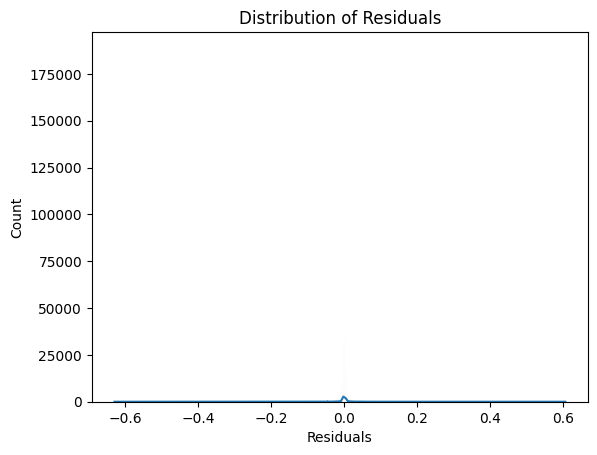

In [27]:
from sklearn.tree import DecisionTreeRegressor
# Predicitve Modelling using Descision Trees

model=DecisionTreeRegressor(criterion="squared_error")
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

# Evalvyating the model performance

mse=metrics.mean_squared_error(y_test,y_pred)
rmse=metrics.root_mean_squared_error(y_test,y_pred)
r2_score=metrics.r2_score(y_test,y_pred)
mae=metrics.mean_absolute_error(y_test,y_pred)


print("Mean Squared Error = ",mse)
print("Root Mean squared Error =",rmse)
print("R2Score=",r2_score)
print("Mean Absolute Error =",mae)

# Visulasing the model performance

residuals=y_test-y_pred
sns.histplot(residuals,kde=True)
plt.xlabel("Residuals")
plt.title("Distribution of Residuals")
plt.show()

Mean Squsred Error =  0.0004337680596269413
Root Mean Squared Error = 0.02082709916495673
R2Score= 0.9996117204689522
Mean Absolute Error = 0.007192734503666074


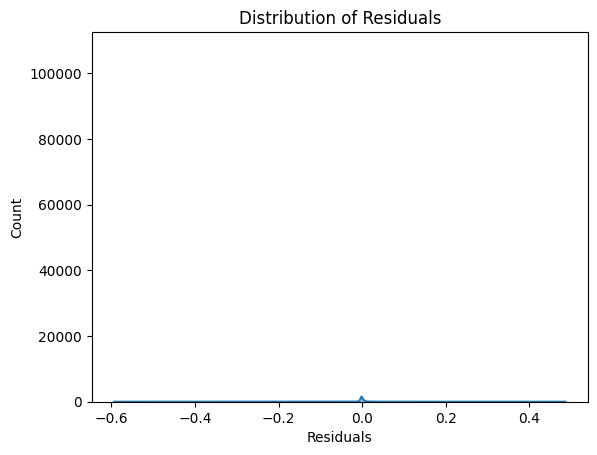

In [28]:
from sklearn.ensemble import RandomForestRegressor
# Prdictive modelling using Random forest

model=RandomForestRegressor(random_state=50,n_estimators=100)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

#Evaluavating the model

mse=metrics.mean_squared_error(y_test,y_pred)
rmse=metrics.root_mean_squared_error(y_test,y_pred)
r2_score=metrics.r2_score(y_test,y_pred)
mae=metrics.mean_absolute_error(y_test,y_pred)

print("Mean Squsred Error = ",mse)
print("Root Mean Squared Error =",rmse)
print("R2Score=",r2_score)
print("Mean Absolute Error =",mae)

# Visualising the model performance
residuals=y_test-y_pred
sns.histplot(residuals,kde=True)
plt.xlabel("Residuals")
plt.title("Distribution of Residuals")
plt.show()

Mean Squsred Error =  0.0003806637837427007
Root Mean Squared Error = 0.019510606954749016
R2Score= 0.9996592557885299
Mean Absolute Error = 0.008992664233970767


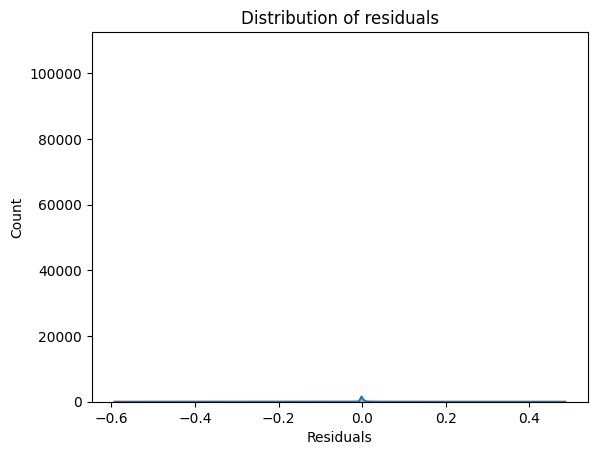

In [29]:
from sklearn.ensemble import GradientBoostingRegressor
# Prdictive Modelling using gradient boosting

model=GradientBoostingRegressor(random_state=50,n_estimators=100,learning_rate=0.5,max_depth=10)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

# Evalvuating the model performance

mse=metrics.mean_squared_error(y_test,y_pred)
rmse=metrics.root_mean_squared_error(y_test,y_pred)
mae=metrics.mean_absolute_error(y_test,y_pred)
r2_score=metrics.r2_score(y_test,y_pred)

print("Mean Squsred Error = ",mse)
print("Root Mean Squared Error =",rmse)
print("R2Score=",r2_score)
print("Mean Absolute Error =",mae)

# Visualising the model performance
residulas=y_test-y_pred
sns.histplot(residuals,kde=True)
plt.xlabel("Residuals")
plt.title("Distribution of residuals")
plt.show()


51232/51232 ━━━━━━━━━━━━━━━━━━━━ 61s 1ms/step - loss: 0.0026
12808/12808 ━━━━━━━━━━━━━━━━━━━━ 8s 616us/step
Mean Squared Error = 0.0005511957106410818
Root Mean Squared Error = 0.02347755759530965
R2_Score = 0.999506607258664
Mean Absolute Error = 0.012486867455385521


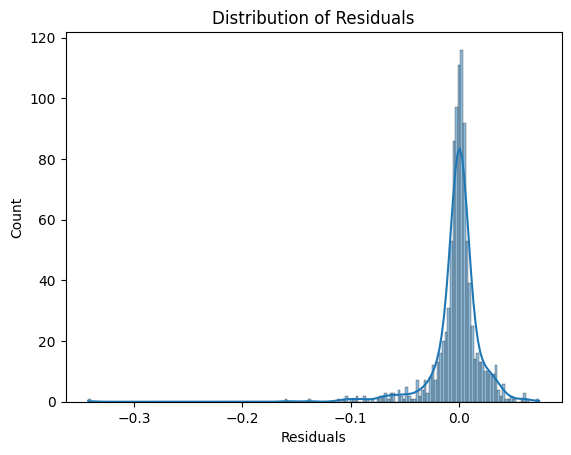

In [30]:
# Pedictive Modelling using Feed forward neural networks (using tensor flow)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu
from tensorflow.keras.losses import Huber

model=Sequential()

model.add(Dense(75,activation=relu))
model.add(Dense(50,activation=relu))
model.add(Dense(25,activation=relu))
model.add(Dense(1))

model.compile(optimizer='adam',loss=Huber())
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

# Evalvuating the model performance

mse=metrics.mean_squared_error(y_test,y_pred)
rmse_value=metrics.root_mean_squared_error(y_test,y_pred)
r2_score=metrics.r2_score(y_test,y_pred)
mae=metrics.mean_absolute_error(y_test,y_pred)

print("Mean Squared Error =",mse)
print("Root Mean Squared Error =",rmse_value)
print("R2_Score =",r2_score)
print("Mean Absolute Error =",mae)

# Sampling the data for visualising the model performance
sample_size = 1000  # Adjust the sample size as needed
sample_indices = np.random.choice(len(y_test), sample_size, replace=False)
y_test_sample = y_test.iloc[sample_indices]
y_pred_sample = y_pred[sample_indices]
y_test_sample = y_test_sample.values.flatten()
y_pred_sample = y_pred_sample.flatten()

# Visualising the model performance
residuals=y_test_sample-y_pred_sample
sns.histplot(residuals,kde=True)
plt.xlabel("Residuals")
plt.title("Distribution of Residuals")
plt.show()
